In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('animals.csv')
df.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN


In [3]:
df.dtypes

Region                  object
Stage                   object
Individual ID           object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [4]:
df.shape

(344, 10)

In [5]:
df.isna().sum()

Region                   0
Stage                    0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [6]:
# Drop rows with 50% or more null values
df.dropna(axis = 0, thresh = len(df.columns)/2, inplace=True)

In [7]:
df.shape

(342, 10)

In [8]:
df.isna().sum()

Region                   0
Stage                    0
Individual ID            0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Delta 15 N (o/oo)       12
Delta 13 C (o/oo)       11
Comments               317
dtype: int64

In [9]:
mean_impute = SimpleImputer(strategy='mean')
mean_impute.fit(df[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']])
df[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = mean_impute.transform(df[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']])

df.isnull().sum()

Region                   0
Stage                    0
Individual ID            0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               317
dtype: int64

In [10]:
df.shape

(342, 10)

In [11]:
# df['Comments'] = df['Comments'].isna().astype(int)
df.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,8.733382,-25.686292,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.949560,-24.694540,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.368210,-25.333020,NaN
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.766510,-25.324260,NaN
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.664960,-25.298050,NaN


In [12]:
# Standardize every variable to be on the same scale

X = df._get_numeric_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

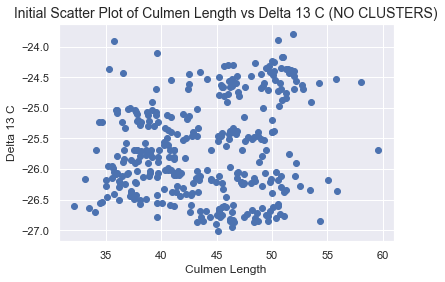

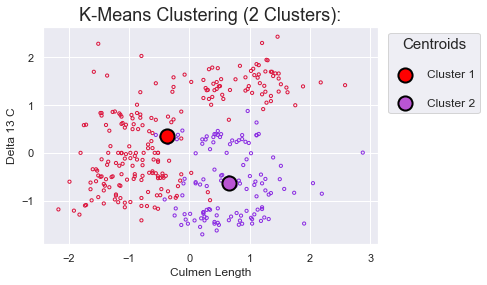

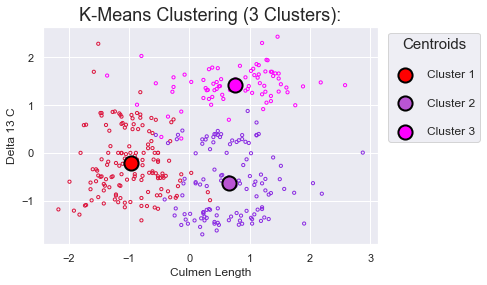

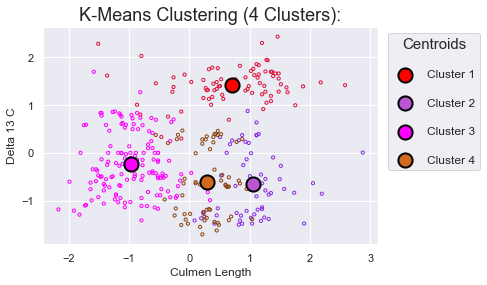

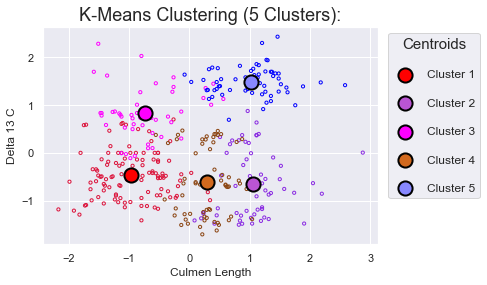

In [13]:
# Initial Scatter Plot (Culmen Length vs. Delta 13 C)
plt.scatter(x=df['Culmen Length (mm)'].values, y=df['Delta 13 C (o/oo)'].values)
plt.xlabel('Culmen Length')
plt.ylabel('Delta 13 C')
plt.title('Initial Scatter Plot of Culmen Length vs Delta 13 C (NO CLUSTERS)',fontsize=14)
plt.show()

# Generate Scatter Plots for K = 2 to K = 5 Clusters
point_colors = ['crimson','blueviolet','magenta','saddlebrown','blue']
center_colors = ['red','mediumorchid','magenta','chocolate','#8888FF']

for i in range (2,6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    for j in range(0,i):
        ax = plt.gca()
        ax.scatter(X[y_kmeans==j, 0], X[y_kmeans==j, 5], s=10, facecolors='none', edgecolors=point_colors[j])

    for k in range(0,i):
        ax.scatter(x = centers[k, 0], y = centers[k, 5], s=200, c = center_colors[k], edgecolors='Black',
        linewidths=2, label = f'Cluster {k+1}')
        
    ax.set_xlabel('Culmen Length')
    ax.set_ylabel('Delta 13 C')
    ax.set_title(f'K-Means Clustering ({i} Clusters):', fontsize=18)
    ax.legend(title = 'Centroids',bbox_to_anchor= (1.013,1),labelspacing = 1.5, fontsize=12, title_fontsize = 15)
    plt.show()



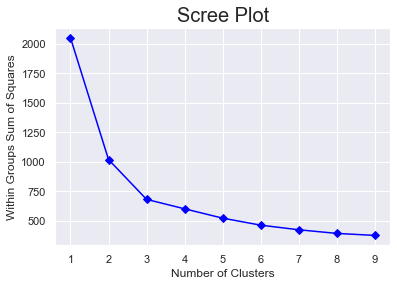

In [14]:
# Scree Plot
# wgss = Within Group Sum of Squares

clusters = []
wgss_list = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wgss = kmeans.inertia_
    ax = plt.gca()
    clusters.append(i)
    wgss_list.append(wgss)

ax = plt.plot(clusters,wgss_list,color='blue',marker = 'D')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Groups Sum of Squares')
plt.title('Scree Plot',fontsize=20)
plt.show()

### Based on the above Scree Plot, the appropriate number of clusters is 3.